In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation = 'relu')
        self.dropout1 = tf.keras.layers.Dropout(0.25)
        self.dense2 = tf.keras.layers.Dense(128, activation = 'relu')
        self.dropout2 = tf.keras.layers.Dropout(0.25)
        self.dense3 = tf.keras.layers.Dense(128, activation = 'relu')
        self.dropout3 = tf.keras.layers.Dropout(0.25)
        self.dense4 = tf.keras.layers.Dense(128, activation = 'relu')
        self.dropout4 = tf.keras.layers.Dropout(0.25)
        self.dense5 = tf.keras.layers.Dense(10, activation = 'softmax')
        
    def call(self, x, training = False, mask = None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dropout1(h)
        h = self.dense2(h)
        h = self.dropout2(h)
        h = self.dense3(h)
        h = self.dropout3(h)
        h = self.dense4(h)
        h = self.dropout4(h)
        return self.dense5(h)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

In [4]:
model = MyModel()

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [5]:
stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [6]:
history = model.fit(train_ds, validation_data = test_ds, epochs = 50, 
                    callbacks=[stopper])

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6618 - accuracy: 0.7613 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4766 - accuracy: 0.8317 - val_loss: 0.4274 - val_accuracy: 0.8435
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4442 - accuracy: 0.8427 - val_loss: 0.4001 - val_accuracy: 0.8572
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4179 - accuracy: 0.8520 - val_loss: 0.3871 - val_accuracy: 0.8572
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4021 - accuracy: 0.8564 - val_loss: 0.3815 - val_accuracy: 0.8656
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3913 - accuracy: 0.8594 - val_loss: 0.3804 - val_accuracy: 0.8640
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3835 - accuracy: 0.8625 - val_loss: 0.3744 - val_a

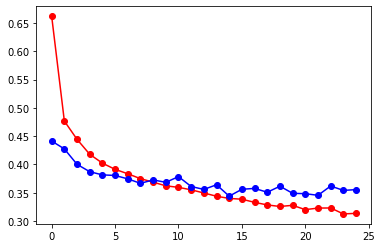

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')